# Anomaly detection implementing Machine learning algorithm

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_csv('Mall_Customers.csv')

In [24]:
data.head(4)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77


In [25]:
data=data.drop('CustomerID',axis=1)
data=data.rename(columns={
 'Annual Income (k$)':'Income',
 'Spending Score (1-100)':'Spend_Score'})

In [26]:
data

,Genre,Age,Income,Spend_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


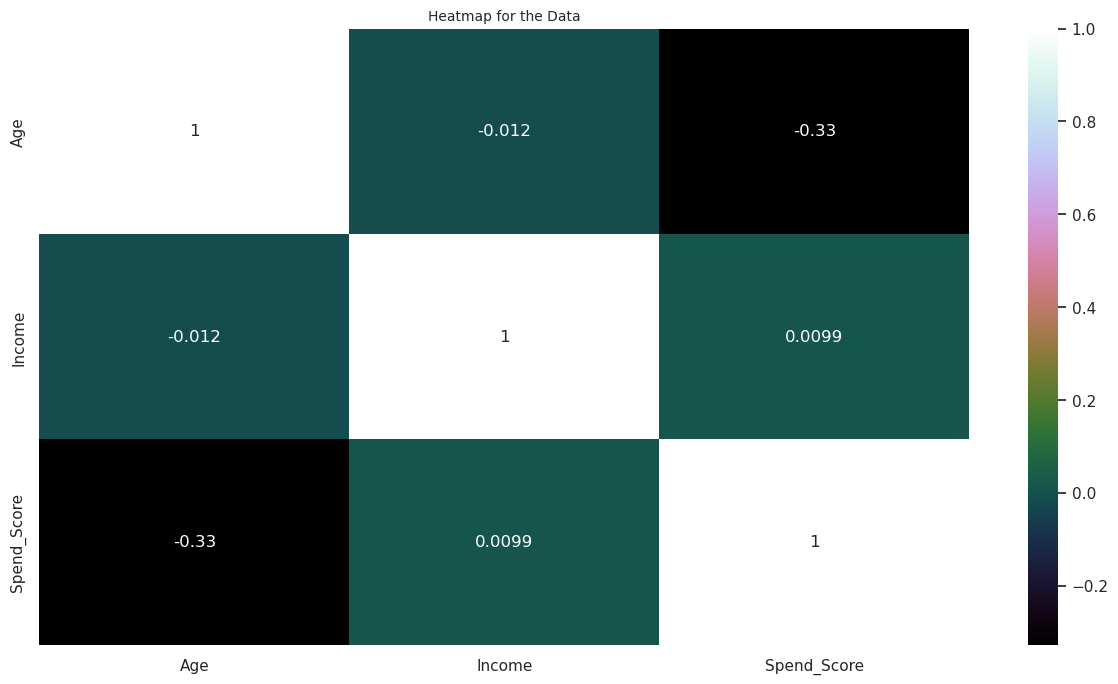

In [52]:
data_corr= data[['Age','Income','Spend_Score']] 
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data_corr.corr(), cmap = 'cubehelix', annot = True)
plt.title('Heatmap for the Data', fontsize = 10)
plt.show()

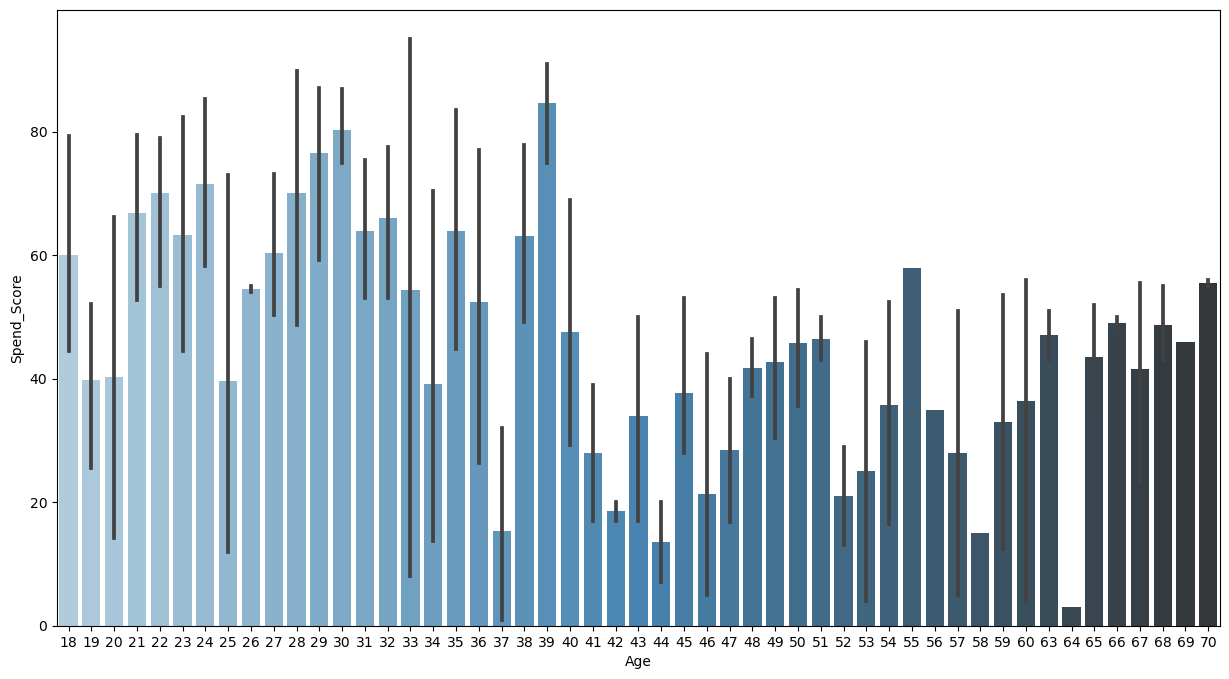

In [34]:
ax = sns.barplot(y= "Spend_Score", x = "Age", data = data, palette=("Blues_d"))
sns.set(rc={'figure.figsize':(27.7,6.30)})
sns.set_context("poster")

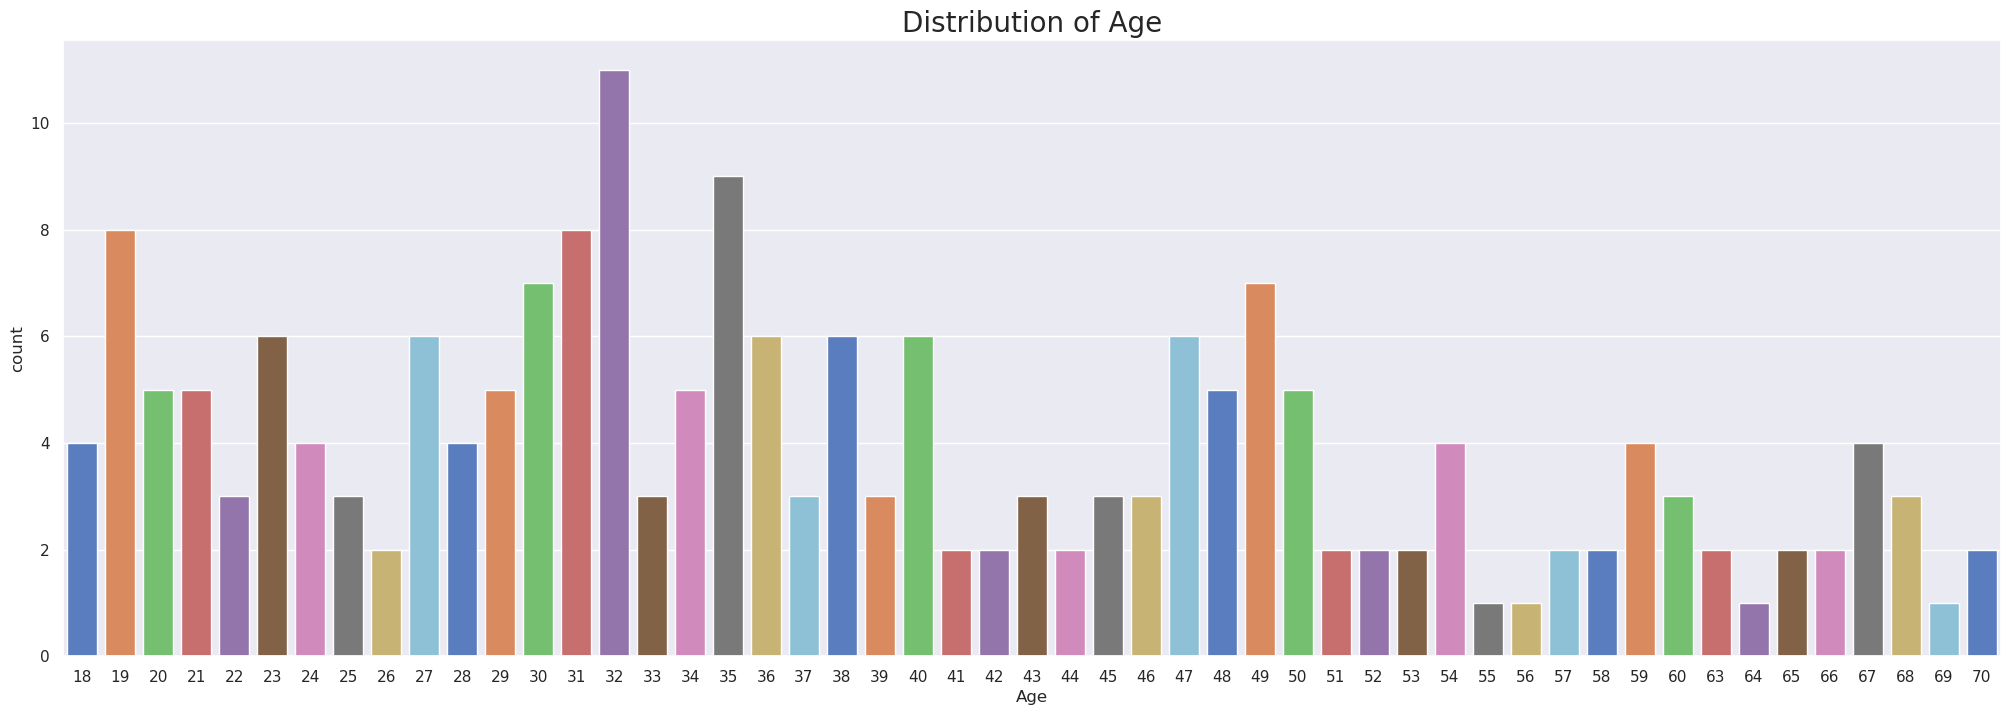

In [53]:
plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(x = 'Age',data = data, palette = 'muted')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

/home/nivedita/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nivedita/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nivedita/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nivedita/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

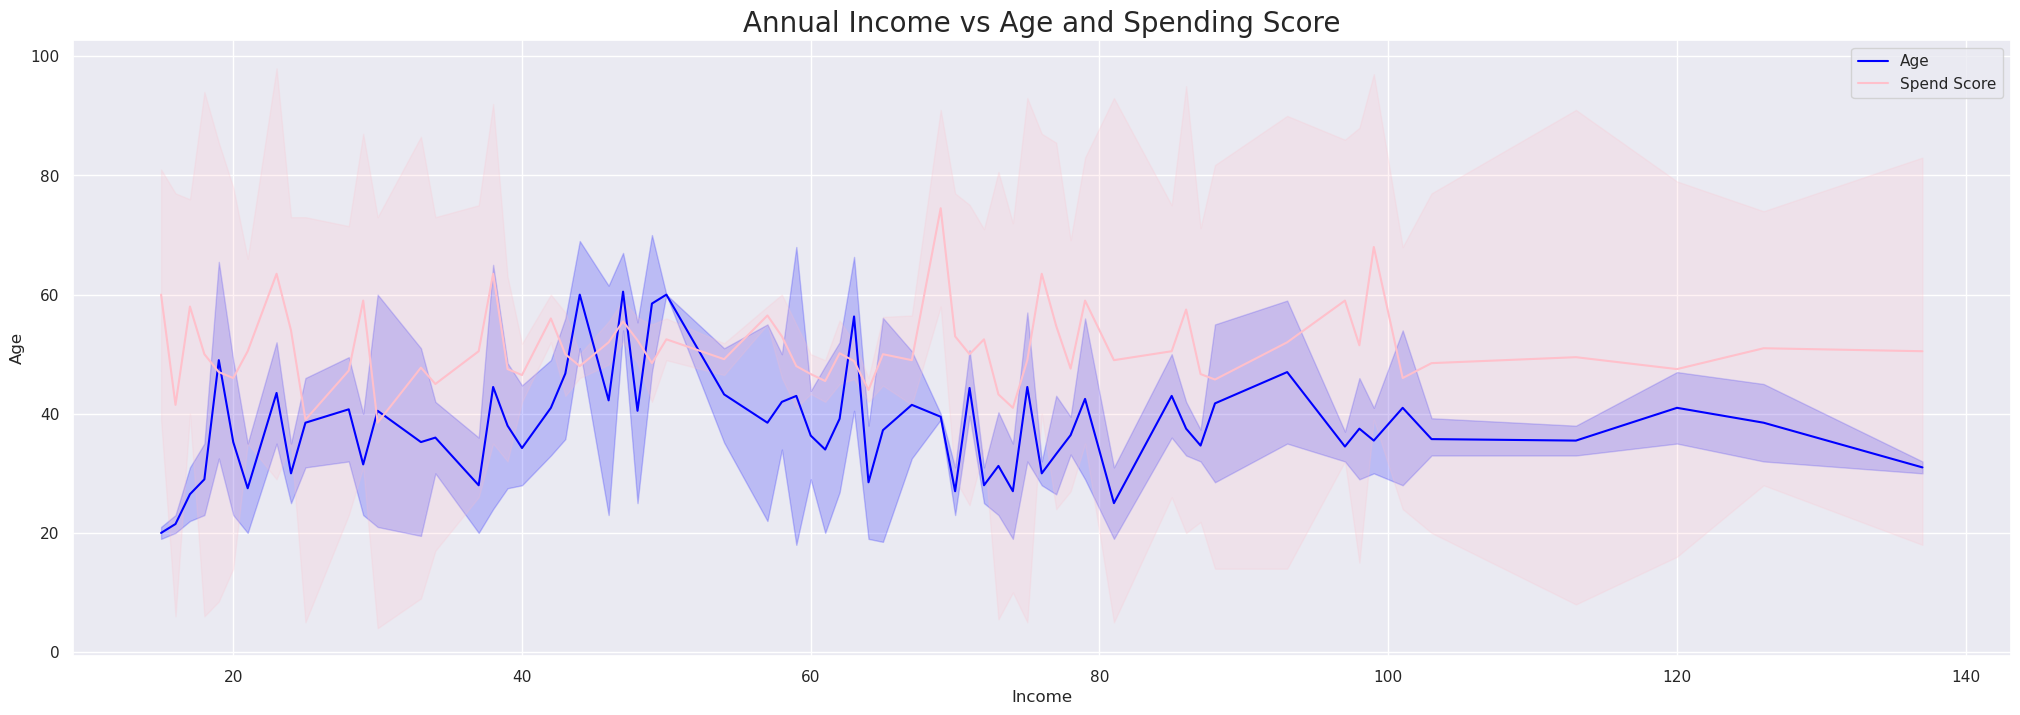

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a DataFrame with columns 'Annual_Income', 'Age', and 'Spend_Score'
x = data['Income']
y = data['Age']
z = data['Spend_Score']

# Plotting Age vs Annual Income
sns.lineplot(x=x, y=y, color='blue', label='Age')
# Plotting Spend Score vs Annual Income
sns.lineplot(x=x, y=z, color='pink', label='Spend Score')

plt.title('Annual Income vs Age and Spending Score', fontsize=20)
plt.legend()
plt.show()


In [ ]:
df=pd.get_dummies(data)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
df_transformed = scaler.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed, columns = df.columns)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Clusters data points based on density, identifying outliers as points in low-density regions.
Effective for data with clusters of varying shapes and sizes.


# DBSCAN

In [7]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(eps = .2, metric="euclidean", min_samples = 5,n_jobs = -1)
clusters = outlier_detection.fit_predict(df_transformed)

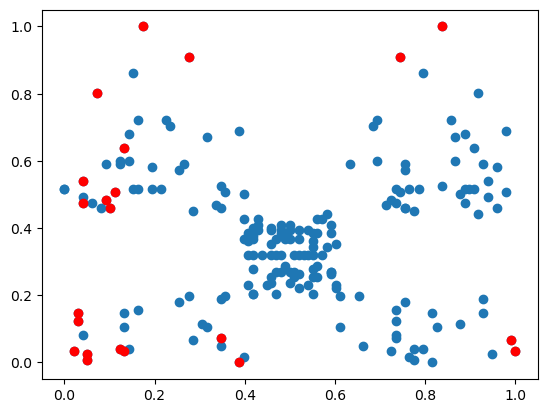

In [8]:
anom_index = np.where(clusters == -1)
values = df_transformed.iloc[anom_index]

plt.scatter(df_transformed['Spend_Score'], df_transformed['Income'])
plt.scatter(values['Spend_Score'], values['Income'], color='r')
plt.show()


# Isolation Forests:

Isolates observations by randomly selecting a feature and then randomly selecting a split value.
Anomalies are identified as observations that require fewer splits to be isolated.
Efficient for high-dimensional data.

# Isolation Forests


 A decision-tree approach to anomaly detection in higher dimensions

In [9]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=100,random_state=rs, contamination=.1) 
clf.fit(df_transformed)
if_scores = clf.decision_function(df_transformed)
if_anomalies=clf.predict(df_transformed)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=df_transformed[if_anomalies==1];


/home/nivedita/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


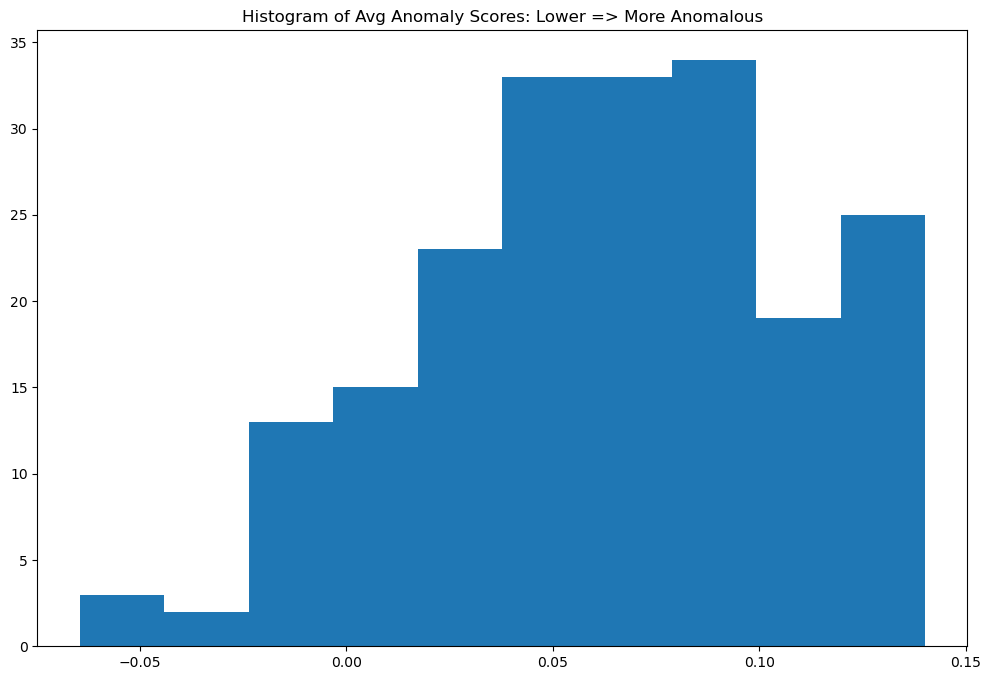

In [10]:
plt.figure(figsize=(12,8))
plt.hist(if_scores);
plt.title('Histogram of Avg Anomaly Scores: Lower => More Anomalous');

Text(0.5, 1.0, 'Isolation Forests - Anomalies')

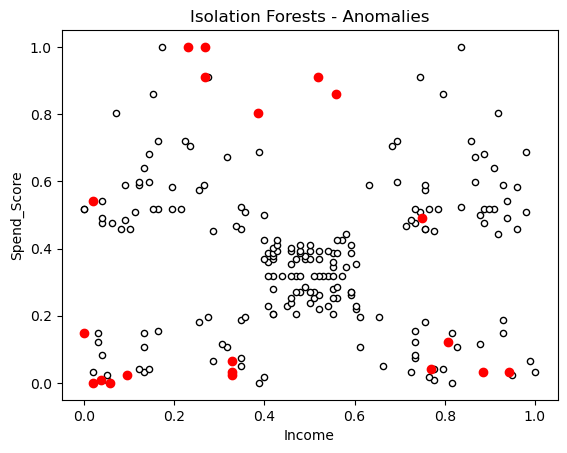

In [11]:
cmap=np.array(['white','red'])
plt.scatter(df_transformed['Spend_Score'],df_transformed['Income'],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.title('Isolation Forests - Anomalies')

# Local Outlier Factor (LOF):

Measures the local density deviation of a given data point with respect to its neighbors.
Points with a significantly lower density than their neighbors are considered anomalies.

# Local Outlier Factor


/tmp/ipykernel_26606/1926517752.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
/tmp/ipykernel_26606/1926517752.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


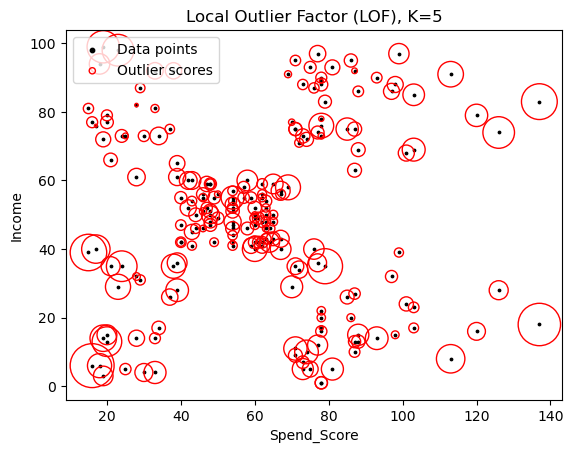

/tmp/ipykernel_26606/1926517752.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
/tmp/ipykernel_26606/1926517752.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


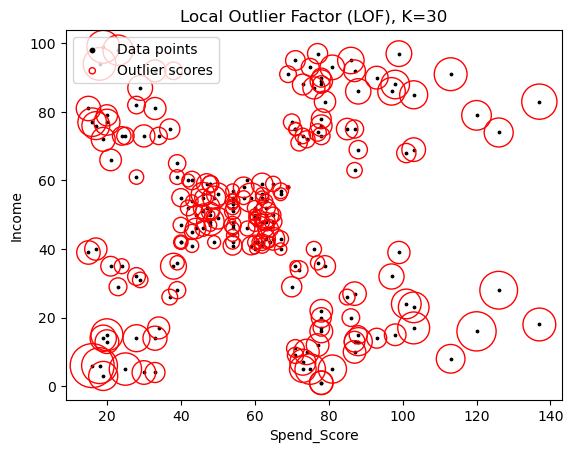

/tmp/ipykernel_26606/1926517752.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
/tmp/ipykernel_26606/1926517752.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


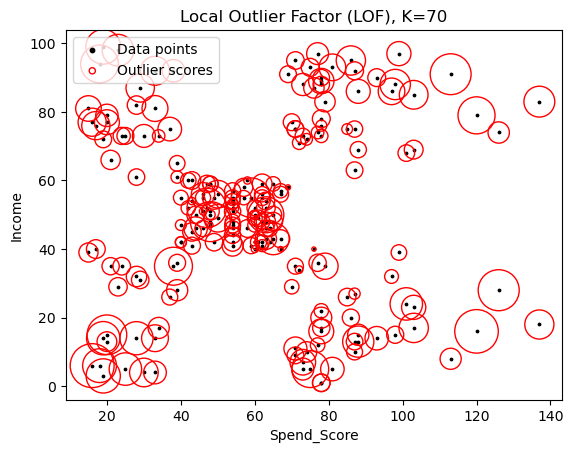

In [12]:
def LOF_plot(k):
 import seaborn as sns
 from sklearn.neighbors import LocalOutlierFactor
 var1,var2=1,2
 clf = LocalOutlierFactor(n_neighbors=k, contamination=.1)
 y_pred = clf.fit_predict(df_transformed)
 LOF_Scores = clf.negative_outlier_factor_
 
 plt.title('Local Outlier Factor (LOF), K={}'.format(k))
 plt.scatter(df.iloc[:, var1], df.iloc[:, var2], color='k', s=3., label='Data points')
 radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
 plt.scatter(df.iloc[:, var1], df.iloc[:, var2], s=1000 * radius, edgecolors='r',
 facecolors='none', label='Outlier scores')
 plt.axis('tight')
 plt.ylabel("{}".format(df.columns[var1]))
 plt.xlabel("{}".format(df.columns[var2]))
 legend = plt.legend(loc='upper left')
 legend.legendHandles[0]._sizes = [10]
 legend.legendHandles[1]._sizes = [20]
 plt.show();
LOF_plot(5)
LOF_plot(30)
LOF_plot(70)


In [13]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
y_pred = clf.fit_predict(df_transformed)
LOF_Scores = clf.negative_outlier_factor_
LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
LOF_anomalies=df_transformed[LOF_pred==1]
#LOF_anomalies

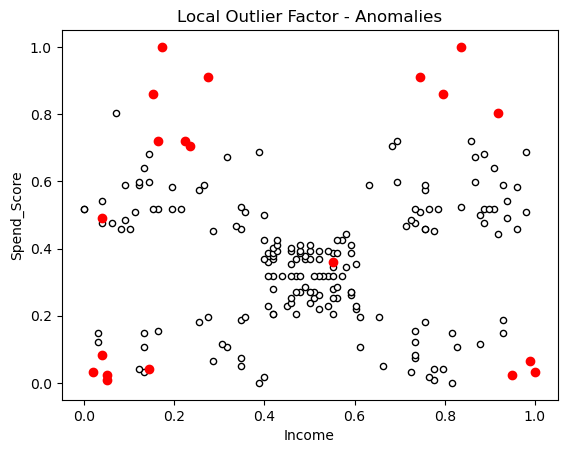

In [14]:
cmap=np.array(['white','red'])
#plt.scatter(num2.iloc[:,1],num2.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(df_transformed['Spend_Score'], df_transformed['Income'],c='white',s=20,edgecolor='k')
#plt.scatter(values['Spend_Score'], values['Income'], color='r')
plt.scatter(LOF_anomalies['Spend_Score'],LOF_anomalies['Income'],c='red')
 #,marker=’x’,s=100)    
plt.title('Local Outlier Factor - Anomalies')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
#plt.scatter(df_transformed['Spend_Score'], df_transformed['Income'])
#plt.scatter(values['Spend_Score'], values['Income'], color='r')

plt.show()

# Robust Covariance:

Estimates the covariance matrix of the data while mitigating the influence of outliers.
Useful for identifying multivariate outliers in datasets.

# Robust Covariance/Elliptic Envelope


In [15]:
from sklearn.covariance import EllipticEnvelope
clf = EllipticEnvelope(contamination=.1,random_state=0)
#elenv = EllipticEnvelope(contamination=.02)
#print(elenv)
clf.fit(df_transformed)
ee_scores = pd.Series(clf.decision_function(df_transformed)) 
ee_predict = clf.predict(df_transformed)
#pred = elenv.fit_predict(x)

#ee_predict

In [16]:
anom_index = np.where(ee_predict==-1)
values = df_transformed.iloc[anom_index]
#values

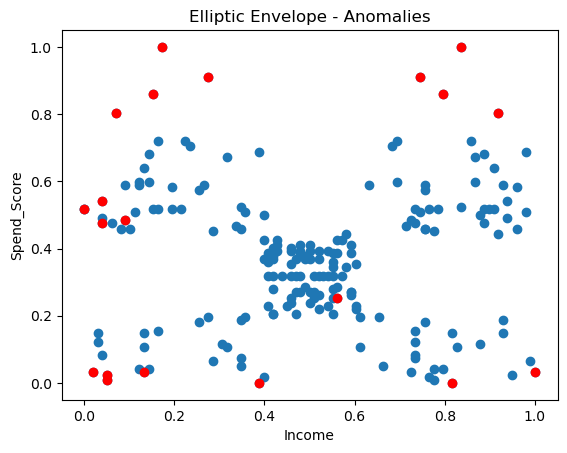

In [17]:
plt.scatter(df_transformed['Spend_Score'], df_transformed['Income'])
plt.scatter(values['Spend_Score'], values['Income'], color='r')
plt.title('Elliptic Envelope - Anomalies')
plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.show()

# One-Class Support Vector Machine (OCSVM):

Trains on the "normal" data to distinguish it from the rest.
Effective for high-dimensional and non-linear data where traditional methods might struggle.


# One-Class Support Vector Machines


In [18]:
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(df_transformed)
y_pred=clf.predict(df_transformed)


In [19]:
anom_index = np.where(y_pred==-1)
values = df_transformed.iloc[anom_index]
#values

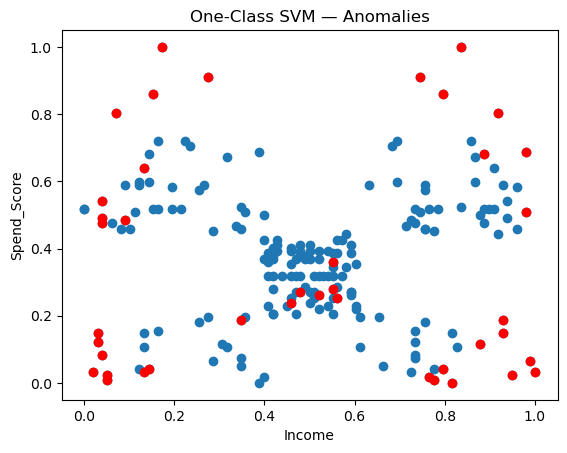

In [20]:
plt.scatter(df_transformed['Spend_Score'], df_transformed['Income'])
plt.scatter(values['Spend_Score'], values['Income'], color='r')
plt.title('One-Class SVM — Anomalies');plt.xlabel('Income')
plt.ylabel('Spend_Score')
plt.show()